# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's load MNIST dataset

In [1]:
%tensorflow_version 2.x
import tensorflow

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [20]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


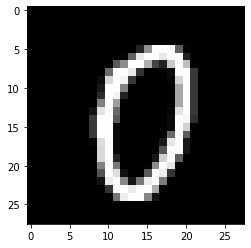

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [22]:
xt1=X_train[y_train<5]
xte1=X_test[y_test<5]
yt1=y_train[y_train<5]
yte1=y_test[y_test<5]
xt2=X_train[y_train>=5]
xte2=X_test[y_test>=5]
yt2=y_train[y_train>=5]
yte2=y_test[y_test>=5]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [23]:
xt1.shape

(30596, 28, 28)

In [24]:
xte1.shape

(5139, 28, 28)

In [25]:
yt1.shape

(30596,)

In [26]:
yte1.shape

(5139,)

In [27]:
xt2.shape

(29404, 28, 28)

In [28]:
xte2.shape

(4861, 28, 28)

In [29]:
yt2.shape

(29404,)

In [30]:
yte2.shape

(4861,)

## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [31]:
xt1=xt1.reshape(xt1.shape[0],28,28,1)
xte1=xte1.reshape(xte1.shape[0],28,28,1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [32]:
xt1.astype('float32')
xt1=xt1/255.0
xte1.astype('float32')
xte1=xte1/255.0

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [33]:
xt1.shape

(30596, 28, 28, 1)

In [34]:
len(xt1)

30596

In [35]:
len(xte1)

5139

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [36]:
from tensorflow.keras.utils import to_categorical
yte1=to_categorical(yte1)
yt1=to_categorical(yt1)

## Question 6
We will build our model by using Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
m=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),Conv2D(32,(3,3),activation='relu'),MaxPooling2D(pool_size=(2,2)),Dropout(.2),Flatten(),Dense(128,activation='relu'),Dense(5,activation='softmax')])

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [38]:
m.compile(optimizer='sgd',metrics='accuracy',loss='categorical_crossentropy')
m.fit(xt1,yt1,batch_size=128,epochs=10,validation_data=(xte1,yte1))

Epoch 1/10
240/240 [==============================] - 28s 116ms/step - loss: 0.9548 - accuracy: 0.6863 - val_loss: 0.1225 - val_accuracy: 0.9638
Epoch 2/10
240/240 [==============================] - 29s 123ms/step - loss: 0.1459 - accuracy: 0.9550 - val_loss: 0.1063 - val_accuracy: 0.9687
Epoch 3/10
240/240 [==============================] - 30s 125ms/step - loss: 0.1222 - accuracy: 0.9625 - val_loss: 0.0781 - val_accuracy: 0.9776
Epoch 4/10
240/240 [==============================] - 29s 119ms/step - loss: 0.1117 - accuracy: 0.9652 - val_loss: 0.6103 - val_accuracy: 0.8212
Epoch 5/10
240/240 [==============================] - 29s 120ms/step - loss: 0.1118 - accuracy: 0.9666 - val_loss: 0.0691 - val_accuracy: 0.9784
Epoch 6/10
240/240 [==============================] - 27s 111ms/step - loss: 0.0952 - accuracy: 0.9696 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 7/10
240/240 [==============================] - 27s 112ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 0.0487 - val_ac

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [42]:
m.layers[0].trainable=False
m.layers[1].trainable=False
m.layers[2].trainable=False
m.layers[3].trainable=False
m.layers[4].trainable=False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [44]:
yt2=yt2-5
yte2=yte2-5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [45]:
xt2=xt2.reshape(xt2.shape[0],28,28,1)
xte2=xte2.reshape(xte2.shape[0],28,28,1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [46]:
xt2=xt2.astype('float32')
xte2=xte2.astype('float32')
xt2/=255.0
xte2/=255.0

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [47]:
xt2.shape

(29404, 28, 28, 1)

In [48]:
len(xt2)

29404

In [49]:
len(xte2)

4861

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [50]:
yt2=to_categorical(yt2)
yte2=to_categorical(yte2)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [51]:
m.fit(xt2,yt2,batch_size=128,epochs=10,validation_data=(xte2,yte2))

Epoch 1/10
230/230 [==============================] - 27s 118ms/step - loss: 0.3740 - accuracy: 0.8790 - val_loss: 0.1889 - val_accuracy: 0.9329
Epoch 2/10
230/230 [==============================] - 26s 113ms/step - loss: 0.1773 - accuracy: 0.9439 - val_loss: 0.1562 - val_accuracy: 0.9484
Epoch 3/10
230/230 [==============================] - 25s 109ms/step - loss: 0.1415 - accuracy: 0.9547 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 4/10
230/230 [==============================] - 25s 110ms/step - loss: 0.1217 - accuracy: 0.9610 - val_loss: 0.0960 - val_accuracy: 0.9691
Epoch 5/10
230/230 [==============================] - 27s 116ms/step - loss: 0.1099 - accuracy: 0.9652 - val_loss: 0.0920 - val_accuracy: 0.9698
Epoch 6/10
230/230 [==============================] - 26s 114ms/step - loss: 0.1020 - accuracy: 0.9665 - val_loss: 0.0978 - val_accuracy: 0.9650
Epoch 7/10
230/230 [==============================] - 25s 110ms/step - loss: 0.0932 - accuracy: 0.9705 - val_loss: 0.0805 - val_ac

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

-----------------------------------------------------------------------------